In [1]:
import pandas as pd

df = pd.read_csv('summer.csv')
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


Get top 5 medalists in all Olypic Games.

In [2]:
df.loc[df.Gender == 'Women']

cnt = df.groupby(['Year', 'Gender', 'Athlete']).count()
agg = cnt.groupby('Athlete').agg({'Medal': sum})

agg.nlargest(5, 'Medal')

,Medal
Athlete,
"PHELPS, Michael",22
"LATYNINA, Larisa",18
"ANDRIANOV, Nikolay",15
"MANGIAROTTI, Edoardo",13
"ONO, Takashi",13


In [3]:
female_medalists = df.loc[df.Gender == 'Women']
cnt = female_medalists.groupby(['Athlete']).count()
agg = cnt.groupby('Athlete').agg({'Medal': sum})

agg.nlargest(1, 'Medal')

,Medal
Athlete,
"LATYNINA, Larisa",18


In [4]:
male_medalists = df.loc[df.Gender == 'Men']
cnt = male_medalists.groupby(['Athlete']).count()
agg = cnt.groupby('Athlete').agg({'Medal': sum})

agg.nlargest(1, 'Medal')

,Medal
Athlete,
"PHELPS, Michael",22


In [5]:
medals_by_country = female_medalists.groupby(['Country']).count()
agg = medals_by_country.groupby('Country').agg({'Medal': sum})

agg.nlargest(10, 'Medal')

,Medal
Country,
USA,1377
URS,573
CHN,537
AUS,493
GER,389
GDR,369
RUS,359
NED,356
ROU,335


In [6]:
medals_by_country = male_medalists.groupby(['Country']).count()
agg = medals_by_country.groupby('Country').agg({'Medal': sum})

agg.nlargest(10, 'Medal')

,Medal
Country,
USA,3208
URS,1476
GBR,1412
FRA,1254
ITA,1161
SWE,953
GER,916
HUN,834
AUS,696


In [7]:
import matplotlib.pyplot as plt

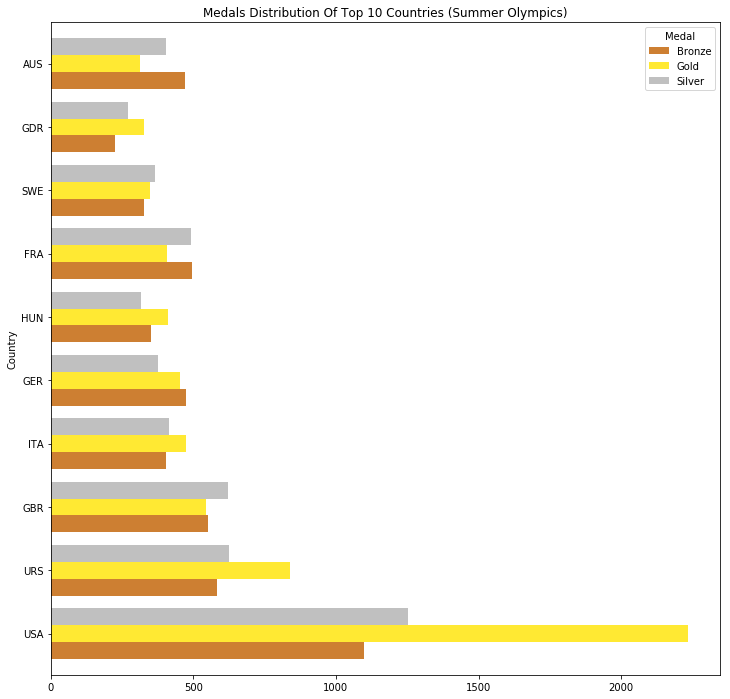

In [10]:
medals_by_country = df.groupby(['Country','Medal'])['Athlete'].count().reset_index()

medals_by_country = medals_by_country.pivot('Country', 'Medal', 'Athlete')

medals_by_country = medals_by_country.sort_values(by='Gold',ascending=False)
medals_by_country = medals_by_country.nlargest(10, 'Gold')

medals_by_country.plot.barh(width = 0.8, color = ['#900C3F','#FFE933','#C0C0C0'])

figure = plt.gcf()
figure.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()